<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/finance/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EA%B8%B0%EB%B0%98%20%EA%B8%88%EC%9C%B5%20%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/Ch_1_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 유형

**특징**

* 알고리즘에 들어가는 입력 데이터이다

**라벨**

* 지도 학습 알고르짐 등에서 학습의 대상이 되는 출력 데이터를 말한다

# 학습 유형

**지도 학습**

* 주어진 특징 데이터셋과 라벨 데이터로부터 학습하는 알고리즘

* 지도 학습은 입력값과 출력값의 관계를 학습하는 것을 목표


**비지도 학습**

* 주어진 특징 데이터만 사용하여 학습하는 알고리즘

* 데이터 내의 구조를 찾아내는 것을 목표

**강화 학습**

* 어떤 학습을 취했을 때 받을 수 있는 보상으로부터 시행착오를 통해 학습하는 알고리즘

* 행동에 따른 보상이나 벌칙에 의해 최적의 행동 정책을 변화시켜 나간다

# 비지도 학습

## Library

In [1]:
import numpy as np
import pandas as pd

In [2]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## K - 평균 클러스터링

* n개의 관측값을 k개의 클러스터로 분류하는 알고리즘

* 각각의 관측값은 클러스터의 평균값 (중심)과 가장 가까운 클러스터에 속하게 된다

In [15]:
# 클러스터링된 샘플 데이터셋을 생성
x, y = make_blobs(n_samples=100,
                  centers=4,
                  random_state=500, 
                  cluster_std=1.25)

In [8]:
print(x[:10])

[[  0.6415   2.1136]
 [  3.4809   2.5586]
 [-10.3492  -3.3263]
 [ -2.4124  -1.5804]
 [ -8.2361  -3.4989]
 [ -7.8003  -0.2203]
 [  4.0447   2.3708]
 [  0.1497  -4.6458]
 [-10.3966  -0.9245]
 [ -0.2041  -3.2118]]


In [9]:
print(y[:10])

[1 1 2 3 2 2 1 3 2 3]


In [16]:
# 클러스터 개수를 고정하여 KMeans 모형 객체를 생성
model = KMeans(n_clusters=4, random_state=0)

In [17]:
# 특징 데이터에 대해 모형 학습
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [19]:
# 학습된 모형으로 예측값을 생성
# 예측값은 0부터 3까지의 숫자로 각각 하나의 클러스터를 뜻함
y_ = model.predict(x)
print(y_)

[0 0 2 1 2 2 0 1 2 1 1 0 1 3 3 0 1 3 1 3 3 0 2 1 2 2 3 3 2 0 1 2 2 3 2 0 2
 0 1 1 1 2 3 3 0 2 1 3 1 3 0 3 2 3 2 0 2 1 3 0 2 3 0 1 0 3 2 2 2 1 0 2 1 3
 1 0 1 3 1 1 2 0 2 0 1 1 0 1 3 3 3 0 0 0 0 3 0 2 3 3]


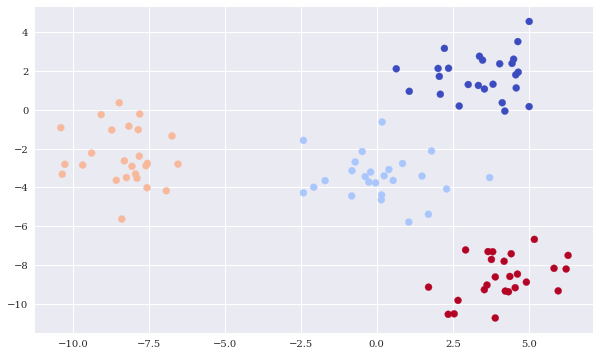

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

# 강화 학습

* 행동을 취한 이후에 관측되는 값, 즉 보수로부터 학습하는 것을 시도한다

* 앞면이 나올 확률은 80%이고 뒷면이 나올 확률이 20%인 동전 던지기 게임에 대한 것이다

* 이 게임은 동전이 앞면이 나올지 뒷면이 나올지 내기하여 맞히면 보수를 받는 것이다


In [26]:
# 상태 공간 (1 = 앞면, 0 = 뒷면)
ssp = [1, 1, 1, 1, 0]

In [27]:
# 행동 공간 (1 = 앞면에 걸기, 0 = 뒷면에 걸기)
asp = [1, 0]

In [28]:
def epoch():
    tr = 0
    for _ in range(100):

        # 행동 공간에서 무작위로 행동을 선택
        a = np.random.choice(asp)

        # 상태 공간에서 무작위로 상태를 선택
        s = np.random.choice(ssp)

        # 행동과 상태가 일치하면 총 보수 tr을 1만큼 증가
        if a == s:
            tr += 1

    return tr

In [29]:
# 한 게임당 내기 횟수만큼 게임 반복, 한 게임당 내기 횟수는 100회
rl = np.array([epoch() for _ in range(15)])
rl

array([47, 53, 50, 61, 50, 43, 46, 53, 53, 54, 55, 44, 50, 51, 50])

In [30]:
# 한 게임당 평균 총 보수
rl.mean()

50.666666666666664

In [31]:
def epoch():
    tr = 0
    
    # 행동 공간을 재설정
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        
        # 관측된 상태값을 행동 공간에 추가
        asp.append(s)
        
    return tr

In [32]:
rl = np.array([epoch() for _ in range(15)])
rl

array([71, 57, 67, 63, 64, 73, 65, 66, 61, 68, 72, 64, 74, 70, 58])

In [33]:
rl.mean()

66.2

# 작업 유형

**추정**

* 라벨값이 연속적인 실수값인 경우

**분류**

* 라벨 데이터가 양의 자연수와 같이 이산적이고 유한한 클래스 혹은 카테고리 값으로 구성된 경우

# 방법론 유형

**인공지능**

* 모든 종류의 학습 알고리즘과 전문가 시스템 같은 기타 학습 알고리즘을 모두 아우르는 개념

**머신러닝**

* 알고리즘과 성공 측도에 기반하여 주어진 데이터셋으로부터 연관성 및 기타 정보를 학습한다

**딥러닝**

* 신경망에 기반한 알고리즘

* '딥'이라는 용어는 신경망이 두 개 이상의 은닉층을 가진 경우에만 쓰인다

# 신경망



**문제 독립성**

* 신경망은 추정 문제를 풀든지 라벨 분류 문제를 풀든지 간에 특징값만 주어지면 풀 수 있다

**점진적 학습**

* 신경망 내의 최적 가중치는 무작위 초깃값부터 시작하여 주어진 성공 측도에 대해 점진적으로 향상된다

**범용 근사**

* 신경망은 거의 모든 종료의 함수를 근사화할 수 있다는 강력한 수학적 정리가 존재한다

## 최소자승 회귀 분석

In [45]:
# 파이썬 함수로 구현한 수학 함수
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [56]:
# 입력값
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [57]:
# 출력값
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

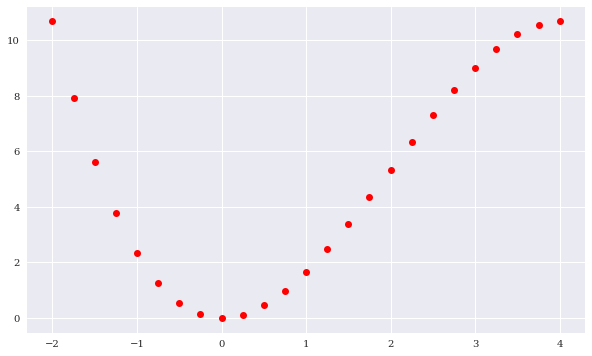

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

In [58]:
# 최적의 베타 계산
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [59]:
# 최적의 알파 계산
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [60]:
# 출력값 추정치 계산
y_ = alpha + beta * x

In [61]:
# 평균제곱오차 계산
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

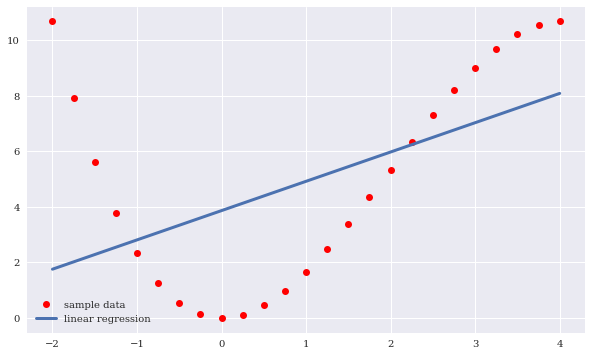

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


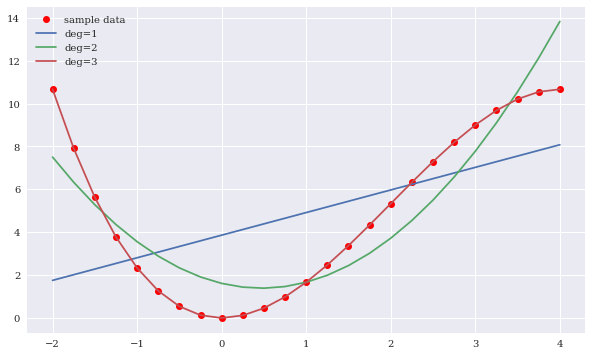

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    
    # 회귀 분석
    reg = np.polyfit(x, y, deg=deg)

    # 추정
    y_ = np.polyval(reg, x)

    # 평균제곱오차 계산
    MSE = ((y - y_) ** 2).mean()

    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
    
plt.legend();

In [63]:
# 최적의 파라미터 값
reg

array([-0.3333,  2.    ,  0.    , -0.    ])

## 신경망을 사용한 추정

* 최소자승 회귀분석 방법은 선형회귀 결과에서 보듯이 잘 정의된 특정한 파라미터값을 한 번에 계산

* 신경망 방법은 점진적인 학습 방법을 사용

* 즉, 신경망 내부의 가중치라는 일련의 파라미터 값이 처음에는 무작위로 초기화되었다가 신경망 출력과 실제 출력값 사이의 차이를 이용해 점진적으로 조정해나간다

### 사이킷런

In [64]:
from sklearn.neural_network import MLPRegressor

In [67]:
# MLPRegressor 객체 초기화
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000,
                     random_state=1000)

In [68]:
# 학습
%time model.fit(x.reshape(-1, 1), y)

CPU times: user 1.3 s, sys: 947 ms, total: 2.25 s
Wall time: 1.2 s


MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000, random_state=1000)

In [69]:
# 추정
y_ = model.predict(x.reshape(-1, 1))

In [70]:
MSE = ((y - y_) ** 2).mean()
MSE

0.006775846547442415

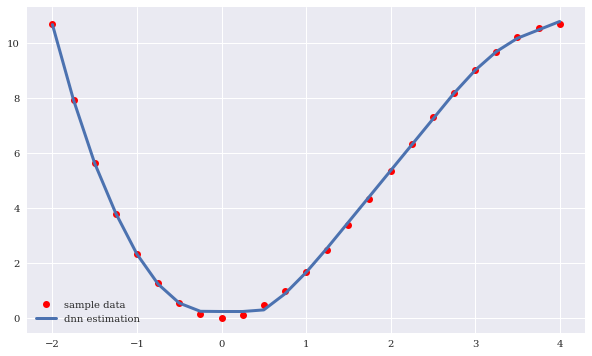

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

### 케라스

In [72]:
import tensorflow as tf
tf.random.set_seed(100)

In [76]:
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import MeanSquaredError

In [74]:
# 모델 객체 초기화
model = Sequential()

# 은닉층 추가
model.add(Dense(256, activation='relu', input_dim=1))

# 출력층 추가
model.add(Dense(1, activation='linear'))

In [75]:
# 컴파일
model.compile(loss='mse', optimizer='rmsprop')

In [80]:
mse = MeanSquaredError()
mse(y, y_).numpy()

0.006775846547442415

1/1 [==============================] - 0s 44ms/step
round=1 | MSE=24.46632
1/1 [==============================] - 0s 30ms/step
round=2 | MSE=27.57814
1/1 [==============================] - 0s 19ms/step
round=3 | MSE=28.35812
1/1 [==============================] - 0s 18ms/step
round=4 | MSE=28.42177
1/1 [==============================] - 0s 23ms/step
round=5 | MSE=28.43365


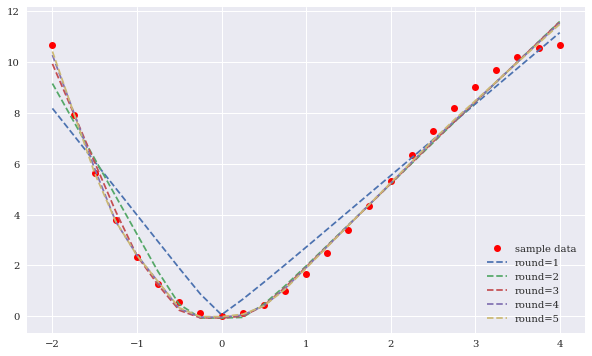

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):

    # 정해진 횟수만큼 신경망 훈련
    model.fit(x, y, epochs=100, verbose=False)

    # 추정
    y_ =  model.predict(x)

    # 현재의 평균제곱오차 계산
    mse = MeanSquaredError()
    MSE = mse(y, y_).numpy()

    # 현재의 추정 결과 플롯
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
    
plt.legend();

# 무작위 샘플과 최소자승 회귀분석 및 신경망 

* 신경망은 200,000개의 학습 가능한 파라미터를 가지고 있어서 아주 높은 유연성을 보여준다

* 하지만 최소자승 회귀분석은 단지 15 + 1 파리미터만 사용한다

In [83]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

In [84]:
len(x)

50

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


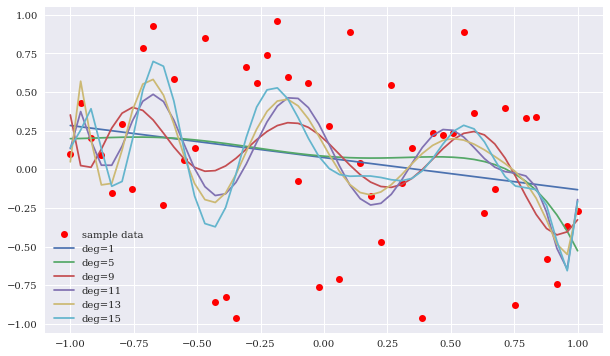

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [86]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


2/2 [==============================] - 0s 8ms/step
round=1 | MSE=0.13002
2/2 [==============================] - 0s 8ms/step
round=2 | MSE=0.09045
2/2 [==============================] - 0s 9ms/step
round=3 | MSE=0.05891
2/2 [==============================] - 0s 8ms/step
round=4 | MSE=0.04494
2/2 [==============================] - 0s 10ms/step
round=5 | MSE=0.03354
2/2 [==============================] - 0s 8ms/step
round=6 | MSE=0.03068
2/2 [==============================] - 0s 7ms/step
round=7 | MSE=0.00564
CPU times: user 55.6 s, sys: 3.43 s, total: 59 s
Wall time: 56.1 s


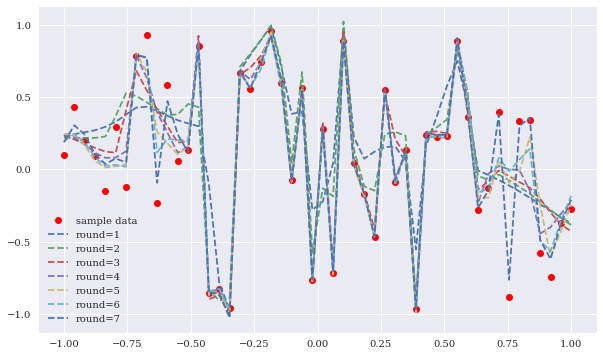

In [88]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

# 신경망을 사용한 분류

In [116]:
f = 5
n = 10

In [117]:
np.random.seed(100)

In [118]:
# 무작위 특징 데이터 생성
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [119]:
# 무작위 라벨 데이터 생성
y = np.random.randint(0, 2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [120]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))

In [121]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [122]:
h = model.fit(x, y, epochs=50, verbose=False)

In [123]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

1/1 [==============================] - 0s 55ms/step


array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [124]:
# 예측값과 실제값 비교
y == y_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [125]:
res = pd.DataFrame(h.history)

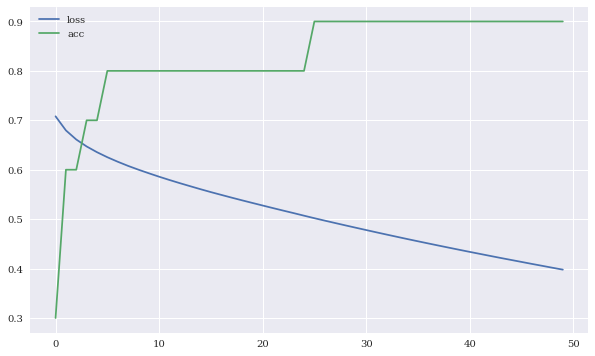

In [126]:
# 학습 횟수에 따른 손실 함수 정확도 값을 플롯
res.plot(figsize=(10, 6));

# 데이터 중요성

## 소규모 데이터셋

In [127]:
f = 10
n = 250

In [128]:
np.random.seed(100)

In [129]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [130]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [131]:
# 패턴의 수
2 ** f

1024

In [132]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [133]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int64
 1   f1      250 non-null    int64
 2   f2      250 non-null    int64
 3   f3      250 non-null    int64
 4   f4      250 non-null    int64
 5   f5      250 non-null    int64
 6   f6      250 non-null    int64
 7   f7      250 non-null    int64
 8   f8      250 non-null    int64
 9   f9      250 non-null    int64
 10  l       250 non-null    int64
dtypes: int64(11)
memory usage: 21.6 KB


In [135]:
# 데이터를 컬럼에 따라 그룹화
grouped = data.groupby(list(data.columns))

In [136]:
# 그룹화된 데이터를 라벨 컬럼에 대해 정리
freq = grouped['l'].size().unstack(fill_value=0)

In [137]:
# 0과 1의 빈도를 누적
freq['sum'] = freq[0] + freq[1]

In [138]:
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [139]:
freq['sum'].describe().astype(int)

count    227
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        2
Name: sum, dtype: int64

In [140]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [141]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000, random_state=100)

In [142]:
model.fit(data[fcols], data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [143]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

In [144]:
split = int(len(data) * 0.7)

In [145]:
train = data[:split]
test = data[split:]

In [146]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [147]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [148]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.38666666666666666

## 대규모 데이터셋

In [149]:
factor = 50

In [150]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                   columns=fcols)

In [151]:
big['l'] = np.random.randint(0, 2, factor * n)

In [152]:
train = big[:split]
test = big[split:]

In [153]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [154]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [155]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.5043407707910751